In [3]:
import numpy as np
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [6]:
#values are taken as col name so we are taking header=none so no clo name are there and values will go back to datset...
df=pd.read_csv("sonar_dataset.csv",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [7]:
df.shape

(208, 61)

In [8]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [9]:
#checking how much m and r values..;.

df[60].value_counts()


M    111
R     97
Name: 60, dtype: int64

In [10]:
x=df.drop(60,axis=1)
y=df[60]

In [12]:
#now replacing y values with M as 1 and R as 0....sim as yes and no....or we are dropng M values with taking it as 0 and R as 1
y=pd.get_dummies(y,drop_first=True)
y.head()


,R
0,1
1,1
2,1
3,1
4,1


In [13]:
x.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=100)

In [15]:
x_train.shape

(156, 60)

In [16]:

y_train.shape

(156, 1)

In [17]:
#building deep learning model....60=no of cloumns=no of neurons in ip layers...2 hidden klayers...
model=keras.Sequential([
    keras.layers.Dense(60,input_shape=(60,),activation='relu'),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])
#taking batch_size mean passing datset in batch size....
model.fit(x_train,y_train,epochs=100,batch_size=8)

Epoch 1/100
20/20 [==============================] - 1s 1000us/step - loss: 0.6854 - accuracy: 0.5769
Epoch 2/100
20/20 [==============================] - 0s 947us/step - loss: 0.6564 - accuracy: 0.6538
Epoch 3/100
20/20 [==============================] - 0s 949us/step - loss: 0.6321 - accuracy: 0.6795
Epoch 4/100
20/20 [==============================] - 0s 1ms/step - loss: 0.6054 - accuracy: 0.6987
Epoch 5/100
20/20 [==============================] - 0s 1ms/step - loss: 0.5894 - accuracy: 0.6795
Epoch 6/100
20/20 [==============================] - 0s 1ms/step - loss: 0.5554 - accuracy: 0.7500
Epoch 7/100
20/20 [==============================] - 0s 1ms/step - loss: 0.5353 - accuracy: 0.7692
Epoch 8/100
20/20 [==============================] - 0s 1ms/step - loss: 0.5055 - accuracy: 0.7628
Epoch 9/100
20/20 [==============================] - 0s 1ms/step - loss: 0.4814 - accuracy: 0.7628
Epoch 10/100
20/20 [==============================] - 0s 1ms/step - loss: 0.4514 - accuracy: 0.8077
Ep

In [19]:
#checing accuracy on test dataset...
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.5420 - accuracy: 0.8846


[0.5420480370521545, 0.8846153616905212]

In [20]:
#x_test in 2D so we need to reshape...
y_pred=model.predict(x_test).reshape(-1)

2/2 [==============================] - 0s 998us/step


In [21]:
y_pred

array([8.9857751e-01, 1.0229074e-03, 9.9998713e-01, 9.9566609e-01,
       9.1280919e-03, 9.9999100e-01, 8.5998903e-04, 1.5939541e-04,
       1.1304130e-06, 3.1732825e-06, 7.8875864e-01, 9.7155043e-07,
       4.1894969e-03, 9.9999750e-01, 9.9989092e-01, 9.9521649e-01,
       2.3390960e-03, 1.9605141e-02, 9.9999511e-01, 9.9513799e-01,
       3.0169183e-09, 1.3784245e-07, 5.3070503e-04, 8.2336767e-03,
       3.5844511e-01, 2.3141508e-04, 1.5431406e-01, 9.9961597e-01,
       9.9990594e-01, 3.0894941e-02, 5.8703619e-04, 9.9979776e-01,
       1.2927918e-02, 1.9127678e-04, 9.9370980e-01, 2.9482280e-03,
       3.3779193e-02, 1.8680180e-07, 2.4477134e-09, 9.8268384e-01,
       9.9860638e-01, 9.9531883e-01, 1.5872853e-02, 9.7888029e-01,
       9.7589177e-01, 2.6844285e-07, 9.7538624e-04, 9.9926925e-01,
       9.9654663e-01, 5.8419403e-10, 9.9768496e-01, 6.2398254e-03],
      dtype=float32)

In [22]:
#taking value as 1 or 0...by using if and for loop...
y_pred2=[1 if i>  0.5 else 0 for i in y_pred]
y_pred2

[1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0]

In [23]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_pred2,y_test))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90        30
           1       0.90      0.82      0.86        22

    accuracy                           0.88        52
   macro avg       0.89      0.88      0.88        52
weighted avg       0.89      0.88      0.88        52



In [24]:
print(confusion_matrix(y_pred2,y_test))

[[28  2]
 [ 4 18]]


Text(0, 0.5, 'truth')

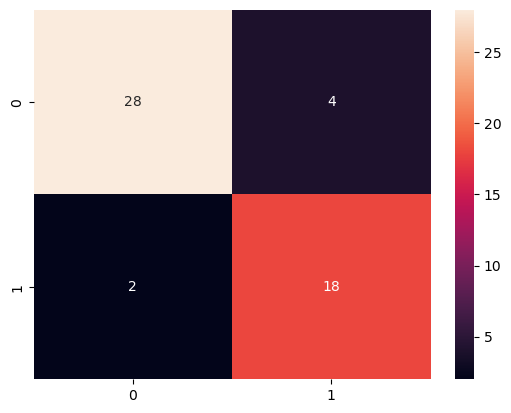

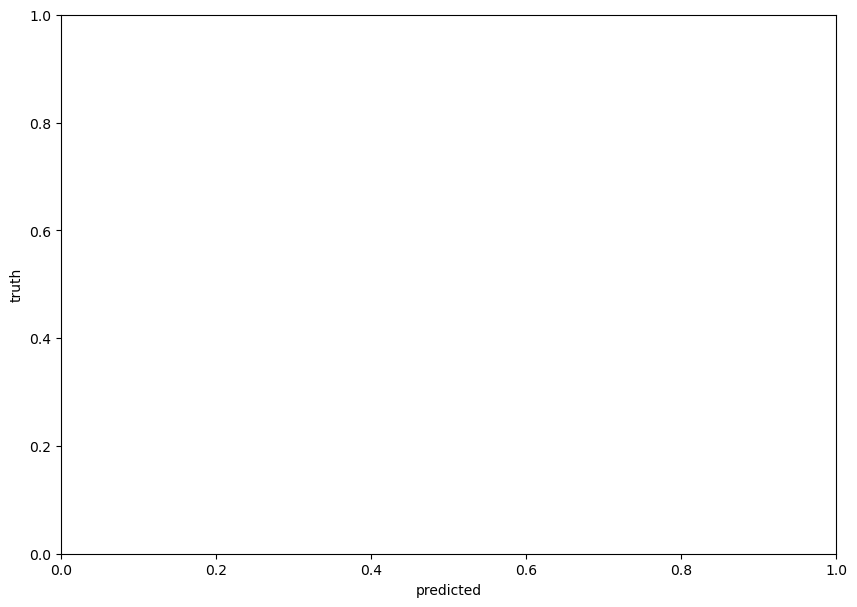

In [25]:
import seaborn as sns
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred2)
sns.heatmap(cm,annot=True,fmt='d')
plt.figure(figsize=(10,7))
plt.xlabel('predicted')
plt.ylabel('truth')

In [27]:
#buildingt model again with dropout function because train  data accuracy is more than test data which says model is overfitting...to avoid overfitting we are using dropout function to drop some neurons from layers....
model=keras.Sequential([
    keras.layers.Dense(60,input_shape=(60,),activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(15,activation='relu'),
    
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])
#taking batch_size mean passing datset in batch size....
model.fit(x_train,y_train,epochs=100,batch_size=8)

Epoch 1/100
20/20 [==============================] - 1s 1ms/step - loss: 0.6950 - accuracy: 0.5064
Epoch 2/100
20/20 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.4808
Epoch 3/100
20/20 [==============================] - 0s 1000us/step - loss: 0.7094 - accuracy: 0.4615
Epoch 4/100
20/20 [==============================] - 0s 1ms/step - loss: 0.6976 - accuracy: 0.5064
Epoch 5/100
20/20 [==============================] - 0s 1ms/step - loss: 0.6841 - accuracy: 0.5577
Epoch 6/100
20/20 [==============================] - 0s 1ms/step - loss: 0.6773 - accuracy: 0.5513
Epoch 7/100
20/20 [==============================] - 0s 1ms/step - loss: 0.6795 - accuracy: 0.5962
Epoch 8/100
20/20 [==============================] - 0s 1ms/step - loss: 0.6663 - accuracy: 0.6154
Epoch 9/100
20/20 [==============================] - 0s 1ms/step - loss: 0.6799 - accuracy: 0.5577
Epoch 10/100
20/20 [==============================] - 0s 1000us/step - loss: 0.6671 - accuracy: 0.6282
Epo

In [28]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.3229 - accuracy: 0.8846


[0.322909414768219, 0.8846153616905212]

In [29]:
y_pred_dr=model.predict(x_test).reshape(-1)

2/2 [==============================] - 0s 2ms/step


In [30]:
y_pred_dr2=[1 if i>  0.5 else 0 for i in y_pred_dr]
y_pred_dr2

[0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0]

In [31]:
print(classification_report(y_pred_dr2,y_test))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90        28
           1       0.95      0.79      0.86        24

    accuracy                           0.88        52
   macro avg       0.90      0.88      0.88        52
weighted avg       0.89      0.88      0.88        52



In [32]:
print(confusion_matrix(y_pred_dr2,y_test))

[[27  1]
 [ 5 19]]
